In [ ]:
pip install statsmodels

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# data loading

file_path = "Nat_Gas.csv"
df = pd.read_csv(file_path, parse_dates=['Dates'])
df.set_index('Dates', inplace=True)
df = df.sort_index()
print(df.head())

            Prices
Dates             
2020-10-31    10.1
2020-11-30    10.3
2020-12-31    11.0
2021-01-31    10.9
2021-02-28    10.9


In [ ]:
print(df.isnull().sum())

Prices    0
dtype: int64


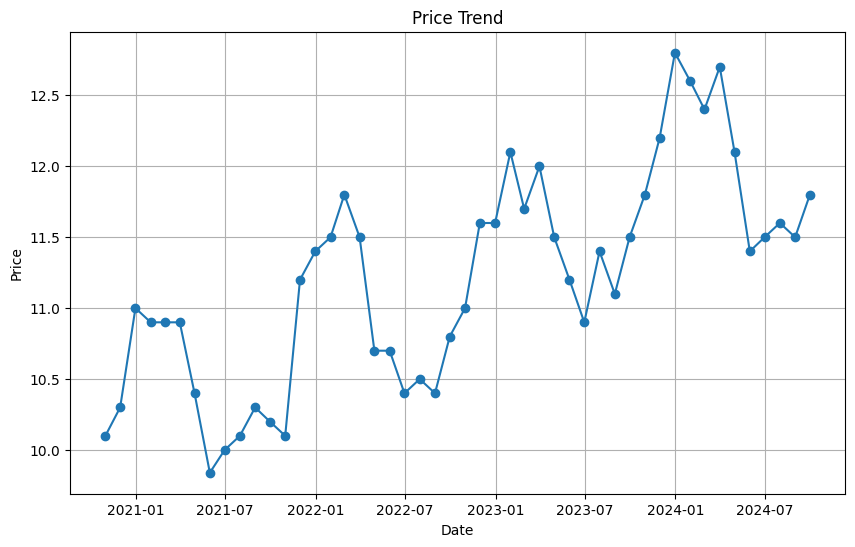

In [ ]:
# trend of price

plt.figure(figsize=(10, 6))
plt.plot(df.index, df, marker='o', linestyle='-')
plt.title('Price Trend')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

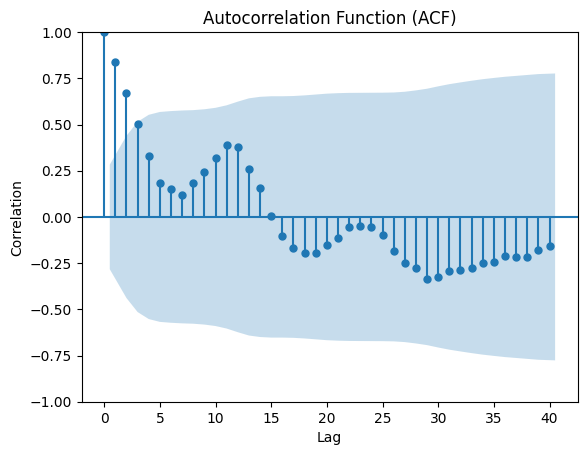

In [ ]:
# Seasonality check

plt.figure(figsize=(12, 6))
plot_acf(df, lags=40)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Run the test on your price column
result = adfuller(df['Prices'])

print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# Interpretation
if result[1] <= 0.05:
    print("Reject the null hypothesis: The data is stationary.")
else:
    print("Fail to reject the null hypothesis: The data is non-stationary.")

ADF Statistic: 0.21807686169999427
p-value: 0.973257438844869
Fail to reject the null hypothesis: The data is non-stationary.


In [ ]:
# Inialise & model fit

model = ExponentialSmoothing(df, trend='add', seasonal='mul', seasonal_periods=12)
model = model.fit()

# Forecast for the next 12 months

forcast_step =12
forecast = model.forecast(steps=forcast_step)
print(forecast)

2024-10-31    12.081941
2024-11-30    12.721069
2024-12-31    13.131759
2025-01-31    13.210676
2025-02-28    13.112333
2025-03-31    13.200764
2025-04-30    12.524848
2025-05-31    12.079222
2025-06-30    11.978114
2025-07-31    12.199011
2025-08-31    12.103080
2025-09-30    12.384835
Freq: ME, dtype: float64


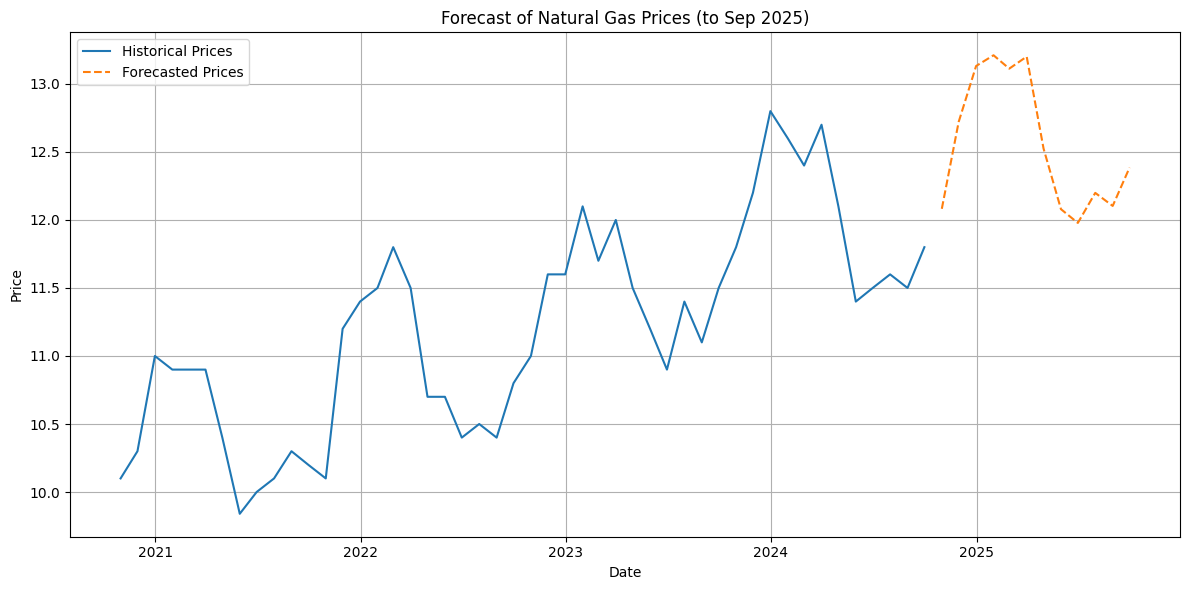

In [ ]:
# Plot historical + forecasted values
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Prices'], label='Historical Prices')
plt.plot(forecast.index, forecast.values, label='Forecasted Prices', linestyle='--')
plt.title('Forecast of Natural Gas Prices (to Sep 2025)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Slicing for exactly 12 months
train = df['Price'][:-12]
test = df['Price'][-12:]

# Fit model ONLY on train data
model = ExponentialSmoothing(train, trend='add', seasonal='mul', seasonal_periods=12).fit()

# Forecast the same number of steps as the test set
forecast = model.forecast(12)

# Calculate metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
mape = np.mean(np.abs((test - forecast) / test)) * 100

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")